# Import headers

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

%matplotlib inline

# {Inputs}

In [2]:
ticker = 'amzn'

eps_ttm             = 22.57                 # {yahoo finance}
pred_5y_growth_rate = 28.00                 # {yahoo finance}
hist_5y_growth_rate = 100.60                # {yahoo finance}
my_est_growth_rate  = 20                # your own prediction
pe_ratio_current    = 84.56                 # {msn money}
pe_ratio_5y_high    = 540.94                # {msn money}
pe_ratio_5y_low     = 540.94                # {msn money}

fv_morning_star     = 2300                # {morning star}

pe_ratio_5y_avg    = (pe_ratio_5y_high + pe_ratio_5y_low) / 2
pe_ratio_rule_1    = 2*hist_5y_growth_rate # Rule #1
est_pe_ratio       = min(pe_ratio_rule_1, pe_ratio_5y_avg)

string_len = 31
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Past 5yrs avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('PE from Historical growth rate', pe_ratio_rule_1, prec=string_len))
print('{:{prec}}: {} {}\n'.format('Estimated PE', est_pe_ratio, ' (Used for predicting fair value)', prec=string_len))

print('{:{prec}}: {}'.format('Historical growth rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Analysts predicted growth rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Custom predicted growth rate', my_est_growth_rate, prec=string_len))

Current PE                     : 84.56

Past 5yrs avg PE               : 540.94
PE from Historical growth rate : 201.2
Estimated PE                   : 201.2  (Used for predicting fair value)

Historical growth rate         : 100.6
Analysts predicted growth rate : 28.0
Custom predicted growth rate   : 20


# Estimate future intrinsic value 
**based on last 5 years avg pe ratio and estimated future eps**

In [3]:
# estimate future eps (for 10 years) based on current_eps and estimated_growth_rate
# future_eps = current_eps + (current_eps * growth_rate)

years_to_estimate_eps = 10 - 1 # first year is already known
est_eps_list   = [eps_ttm]

est_eps                             = eps_ttm
est_eps_my_growth_rate              = eps_ttm
est_eps_analysts_growth_rate        = eps_ttm

est_value_list                      = [eps_ttm * est_pe_ratio]
est_value_my_growth_rate_list       = [eps_ttm * est_pe_ratio]
est_value_analysts_growth_rate_list = [eps_ttm * est_pe_ratio]

for i in range(years_to_estimate_eps):
    est_eps = est_eps + (est_eps * hist_5y_growth_rate/100)
    est_eps_list.append(round(est_eps, 2))
    est_value_list.append(round(est_eps * est_pe_ratio, 2))
    
    est_eps_my_growth_rate = est_eps_my_growth_rate + (est_eps_my_growth_rate * my_est_growth_rate/100)
    est_value_my_growth_rate_list.append(round(est_eps_my_growth_rate * est_pe_ratio, 2))

    est_eps_analysts_growth_rate = est_eps_analysts_growth_rate + (est_eps_analysts_growth_rate * pred_5y_growth_rate/100)
    est_value_analysts_growth_rate_list.append(round(est_eps_analysts_growth_rate * est_pe_ratio, 2))

est_eps_series = pd.Series(est_eps_list, name='Est EPS', index=range(1,11))
est_value_series = pd.Series(est_value_list, name='Est Fair Value', index=range(1,11))
est_value_my_growth_rate_series = pd.Series(est_value_my_growth_rate_list, name='Est Fair Value (My Growth Rate)', index=range(1,11))

estimated_price_df = pd.DataFrame([est_eps_series, est_value_series, est_value_my_growth_rate_series]).T
# estimated_price_df

# Read fundamentals

In [4]:
df = pd.read_csv('data/{}.csv'.format(ticker), sep='|', parse_dates=True, index_col=0, header=None).T
df['Year'] = pd.to_datetime(df['Year'].astype('int32'), format='%Y', yearfirst=False)
df.set_index('Year', inplace=True)

df.head()

,Revenue,Revenue Growth,Gross Profit,Gross Margin,Operating Profit,Operating Margin,Earnings Per Share,EPS Growth,Return on Assets,Return on Equity,Return on Invested Capital,Equity Growth,Cash from Operations,Capital Expenditures,Free Cash Flow Growth,Market Capitalization,Price-to-Earnings
Year,,,,,,,,,,,,,,,,,
2009-01-01,312.0,2.7,233.0,74.8,-34.0,-10.9,-0.45,-138.1,-9.9,-12.7,-32.1,24.9,86.6,49.8,163.5,1188.0,-37.99
2010-01-01,387.0,23.9,303.0,78.4,107.0,27.7,0.95,311.1,17.8,22.8,92.2,38.4,74.6,-150.7,66.5,1488.0,20.04
2011-01-01,480.0,23.9,361.0,75.3,90.0,18.8,0.83,-12.6,11.8,15.4,42.1,29.9,0.7,-68.6,-10.3,1862.0,27.91
2012-01-01,560.0,16.7,416.0,74.3,86.0,15.3,0.71,-14.5,8.4,10.9,24.0,18.4,2.5,-26.1,-4.6,2257.0,38.46
2013-01-01,660.0,17.9,498.0,75.4,94.0,14.3,0.78,9.9,8.1,10.6,25.2,9.1,39.0,49.4,74.5,4562.0,70.96


# Inspect the datatypes

In [5]:
df.dtypes

0
Revenue                       float64
Revenue Growth                float64
Gross Profit                  float64
Gross Margin                  float64
Operating Profit              float64
Operating Margin              float64
Earnings Per Share            float64
EPS Growth                    float64
Return on Assets              float64
Return on Equity              float64
Return on Invested Capital    float64
Equity Growth                 float64
Cash from Operations          float64
Capital Expenditures          float64
Free Cash Flow Growth         float64
Market Capitalization         float64
Price-to-Earnings             float64
dtype: object

# Draw charts fn()

In [6]:
def draw_chart(data, columns, title, mark_green_zone=(False, 15), draw_mean=False):
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    ax.set_title(title)
    fig.tight_layout()
    
    for c in columns:
        plt.plot(data[c], marker='o', linestyle='-', label=c)

    if mark_green_zone[0]:
        ax.axhspan(ymin=0, ymax=mark_green_zone[1], color='green', fill=True, alpha=.1)
        
    if draw_mean:
        plt.plot(df[columns].mean(1), marker=',', linestyle='--', label='Average Growth', color='gray')

    ax.legend()
    plt.show()

# Fundamentals

0           Revenue Growth  EPS Growth  Free Cash Flow Growth  Equity Growth
Year                                                                        
2009-01-01             2.7      -138.1                  163.5           24.9
2010-01-01            23.9       311.1                   66.5           38.4
2011-01-01            23.9       -12.6                  -10.3           29.9
2012-01-01            16.7       -14.5                   -4.6           18.4
2013-01-01            17.9         9.9                   74.5            9.1
2014-01-01            15.4       126.9                   21.8           18.7
2015-01-01            11.0         0.0                   -9.0           12.6
2016-01-01            27.7        31.6                   -4.0           17.4
2017-01-01            36.4        21.5                   37.1           16.0
2018-01-01            33.5        73.9                   36.5            8.5


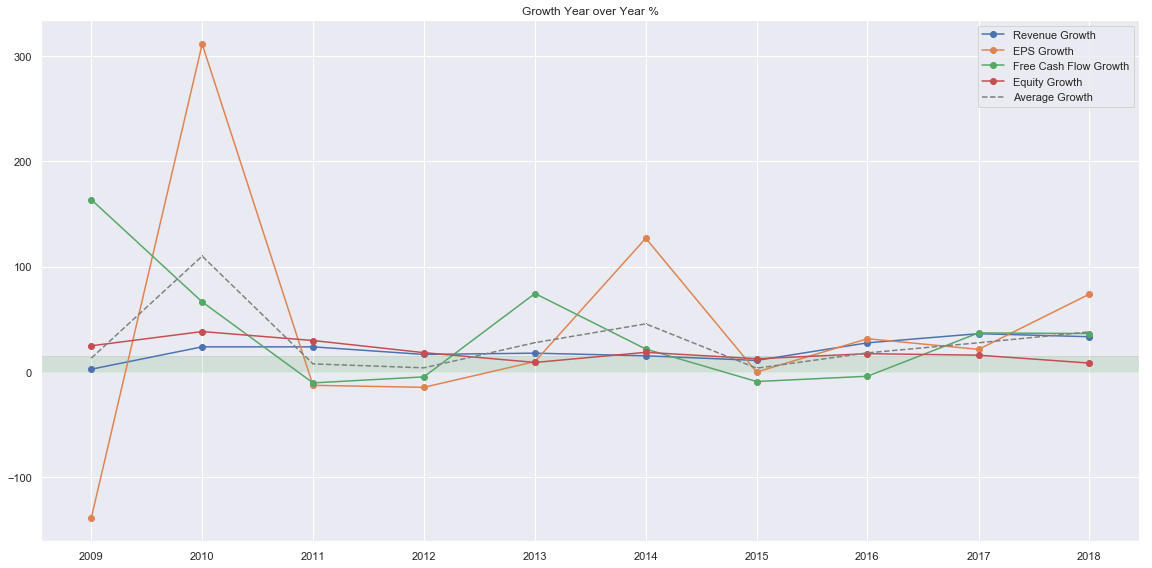

In [7]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

# print('All 4 growth rates should be >15%')

print(df[columns])

draw_chart(df, columns, title='Growth Year over Year %', mark_green_zone=(True, 15), draw_mean=True)

# Returns

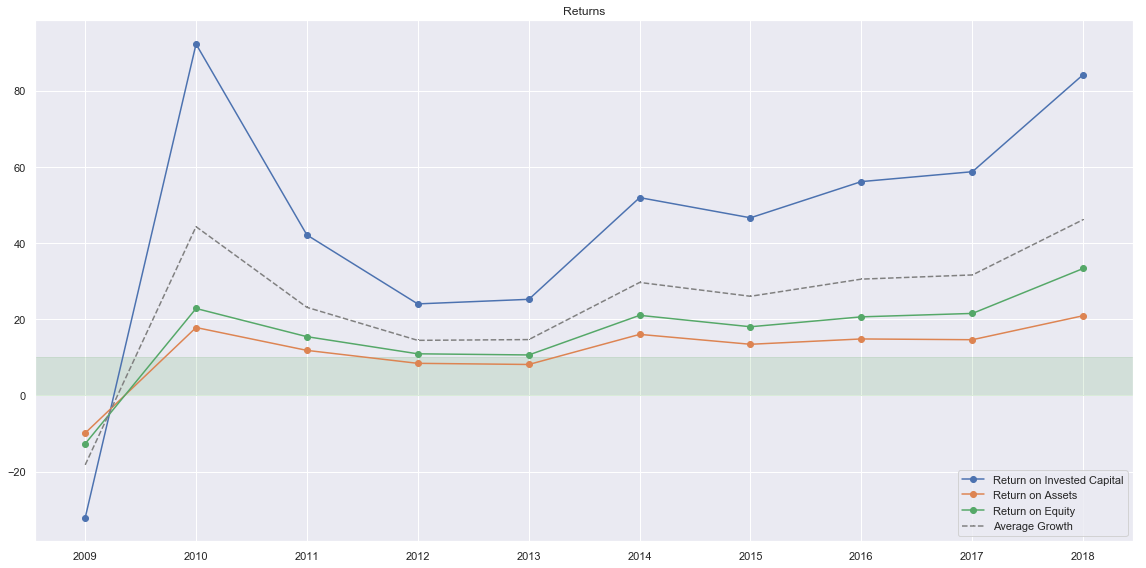

In [8]:
columns = ['Return on Invested Capital',
           'Return on Assets',
           'Return on Equity']

draw_chart(df, columns, title='Returns', mark_green_zone=(True, 10), draw_mean=True)

# ROIC: should be >10%
# ROE : should be +ve

# PE

0           Price-to-Earnings
Year                         
2009-01-01             -37.99
2010-01-01              20.04
2011-01-01              27.91
2012-01-01              38.46
2013-01-01              70.96
2014-01-01              30.97
2015-01-01              36.61
2016-01-01              40.57
2017-01-01              76.95
2018-01-01              42.03


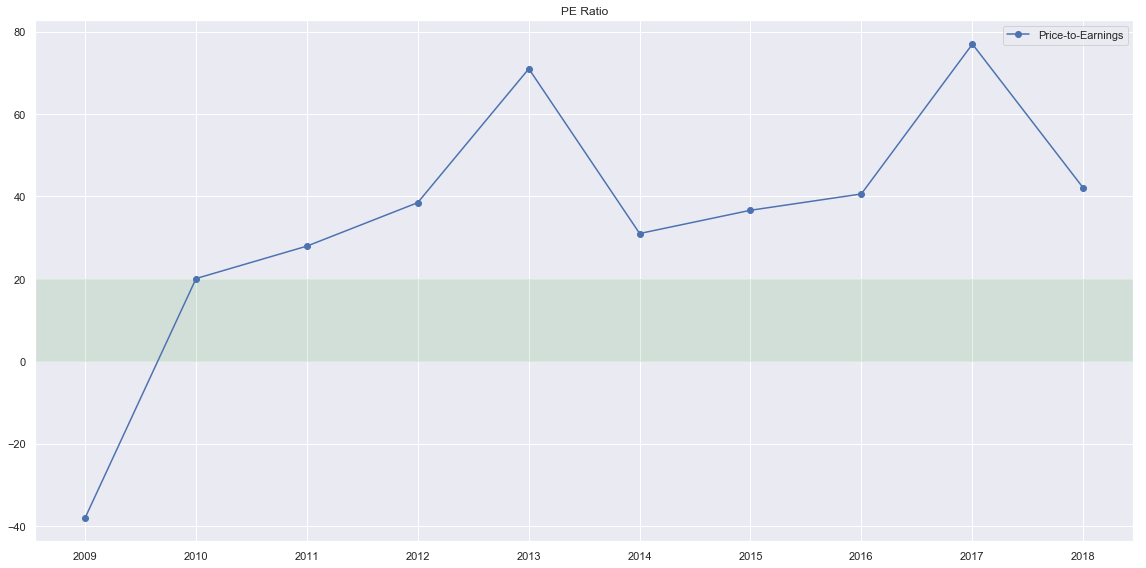

In [9]:
columns = ['Price-to-Earnings']

print(df[columns])
draw_chart(df, columns, title='PE Ratio', mark_green_zone=(True, 20))

# PE ratio: Lower is better. Compare with competators.
# EPS     : Should be +ve

# Market Cap

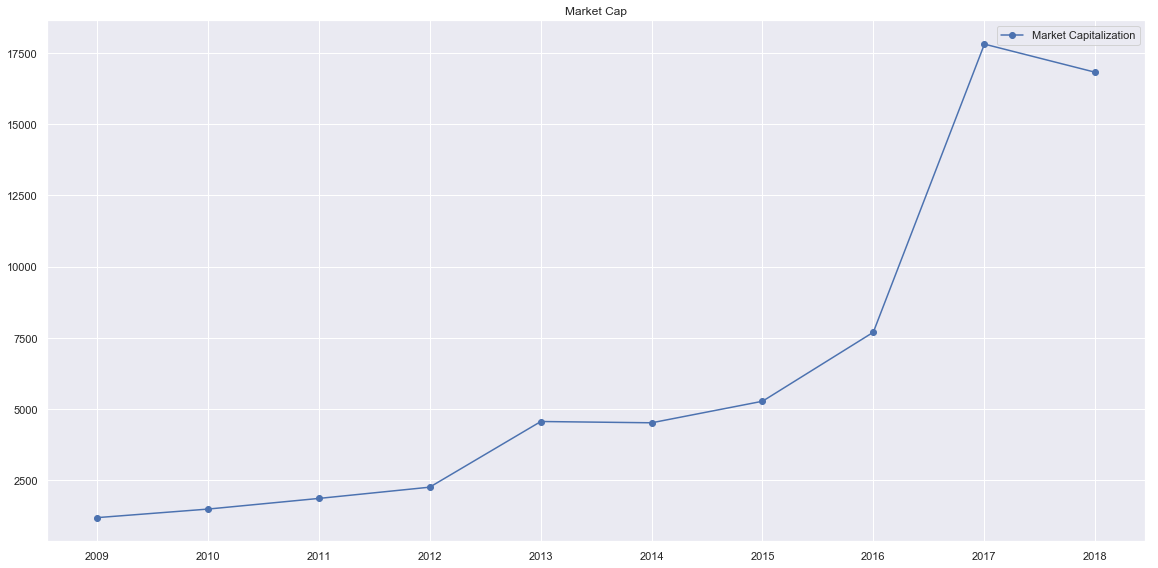

In [10]:
columns = ['Market Capitalization']
draw_chart(df, columns, title='Market Cap')

# Estimated Fair Value

     Est EPS  Est Fair Value  Est Fair Value (My Growth Rate)
1      22.57        4541.084                         4541.084
2      45.28        9109.410                         5449.300
3      90.82       18273.490                         6539.160
4     182.19       36656.610                         7846.990
5     365.47       73533.160                         9416.390
6     733.14      147507.530                        11299.670
7    1470.68      295900.100                        13559.600
8    2950.18      593575.590                        16271.520
9    5918.05     1190712.640                        19525.830
10  11871.62     2388569.560                        23431.000


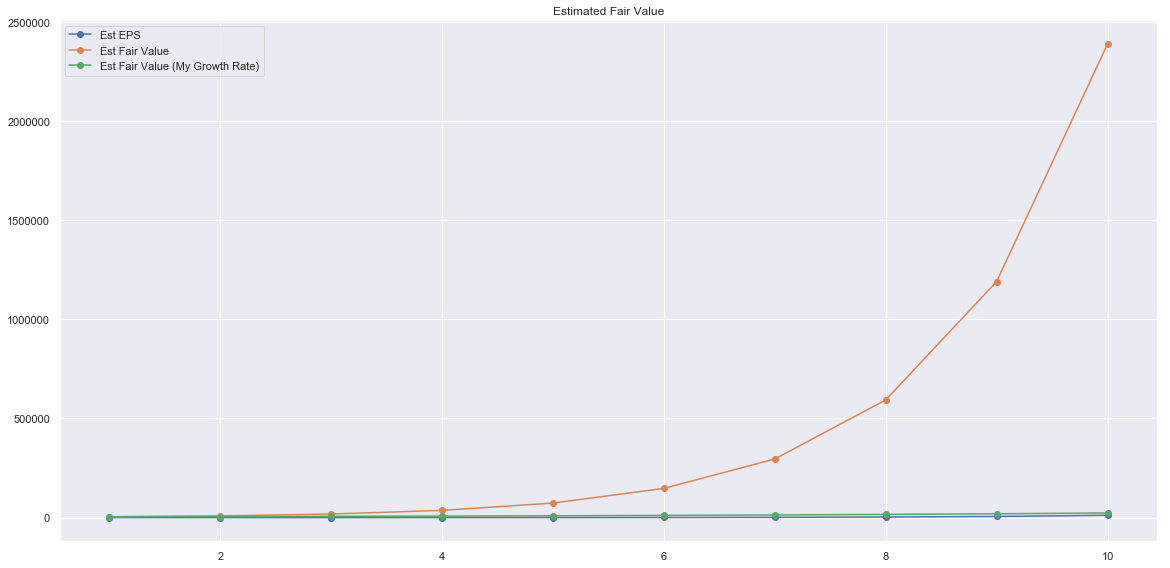

In [11]:
columns = ['Est EPS', 'Est Fair Value', 'Est Fair Value (My Growth Rate)']
print(estimated_price_df)
draw_chart(estimated_price_df, columns, title='Estimated Fair Value')

In [12]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']
df[columns].mean(1)[-1]

38.1

# Look at some numbers

In [13]:
# At buying point, current PE should be less than
# - historical average PE
# - 2x analysts 5y growth rate prediction {yahoo finance}
# - 2x historical equity growth rate      {}
# - 2x last years average growth rate (revenue, equity, fcf, eps)

columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

string_len = 33
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Historical avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('Historical Growth Rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Predicted Growth Rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Historical Equity Growth Rate', df['Equity Growth'].mean(), prec=string_len))
print('{:{prec}}: {}'.format('Last Years Avg Growth Rate', df[columns].mean(1)[-1], prec=string_len))

Current PE                       : 84.56

Historical avg PE                : 540.94
Historical Growth Rate           : 100.6
Predicted Growth Rate            : 28.0
Historical Equity Growth Rate    : 19.389999999999997
Last Years Avg Growth Rate       : 38.1


# Fair Value prediction

In [14]:
fv_historic_pe = round(eps_ttm * pe_ratio_5y_avg, 2)
fv_historic_growth = round(eps_ttm * (2*hist_5y_growth_rate), 2)
fv_analysts_prediction = round(eps_ttm * (2*pred_5y_growth_rate), 2)

string_len = 47
print('{:{prec}}: {}'.format('Fair Value (Morning Star)', fv_morning_star, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Avg PE (msn))', fv_historic_pe, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Growth (yahoo))', fv_historic_growth, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Analysts predicted Growth (yahoo))', fv_analysts_prediction, prec=string_len))

Fair Value (Morning Star)                      : 2300
Fair Value (Historic Avg PE (msn))             : 12209.02
Fair Value (Historic Growth (yahoo))           : 4541.08
Fair Value (Analysts predicted Growth (yahoo)) : 1263.92


# Verdict: Bye bellow {1800}